# GAN Debugging Notebook

This notebook is provided to help you debug your code. We provide you with small discriminator and generator networks that you can train on the MNIST dataset. This small GAN can be trained quickly on MNIST and will help you verify that your loss functions and training code is correct.

In [1]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [2]:
from gan.train import train
from gan.utils import sample_noise, show_images, deprocess_img, preprocess_img
from gan.losses import discriminator_loss, generator_loss, ls_discriminator_loss, ls_generator_loss

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## MNIST Dataset


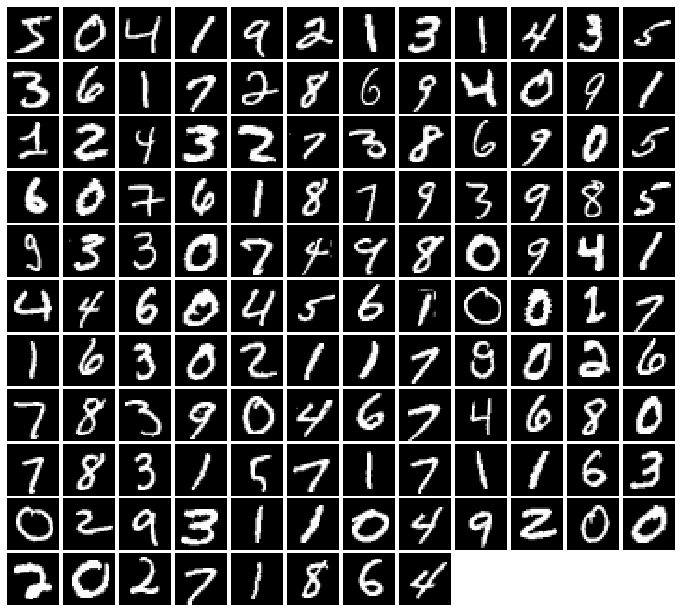

In [4]:
NOISE_DIM = 100
batch_size = 128

mnist = datasets.MNIST('./MNIST_data', train=True, download=True,
                           transform=transforms.ToTensor())
loader_train = DataLoader(mnist, batch_size=batch_size, drop_last=True)


imgs = loader_train.__iter__().next()[0].view(batch_size, 784).numpy().squeeze()
show_images(imgs)

# Discriminator and Generator


In [5]:
class Flatten(nn.Module):
    def forward(self, x):
        N, C, H, W = x.size() # read in N, C, H, W
        return x.view(N, -1)  # "flatten" the C * H * W values into a single vector per image


In [6]:
def discriminator():
    """
    Initialize and return a simple discriminator model.
    """
    model = torch.nn.Sequential( Flatten(),
                                torch.nn.Linear(784, 256), 
                                torch.nn.LeakyReLU(),
                                torch.nn.Linear(256, 256), 
                                torch.nn.LeakyReLU(),
                                torch.nn.Linear(256, 1)
    )
    return model

In [7]:
def generator(noise_dim=NOISE_DIM):
    """
    Initialize and return a simple generator model.
    """
    
    model = nn.Sequential(
        torch.nn.Linear(noise_dim, 1024),
        torch.nn.ReLU(),
        torch.nn.Linear(1024, 1024),
        torch.nn.ReLU(),
        torch.nn.Linear(1024, 784),
        torch.nn.Tanh()
    )

    return model

Test to make sure the number of parameters in the generator is correct:

# Train

The simple model provided will train on MNIST in only a few minutes. You should expect results that resemble the following if your loss function and training loop implementations are correct:

<img src="files/gan_samples/mnist.jpg" width=500>

EPOCH:  1
Iter: 0, D: 1.374, G:0.702


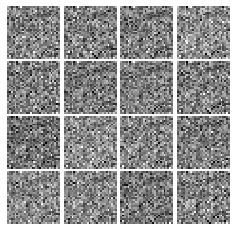


Iter: 250, D: 1.355, G:1.189


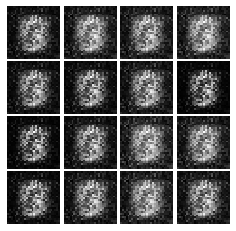


EPOCH:  2
Iter: 500, D: 1.076, G:1.346


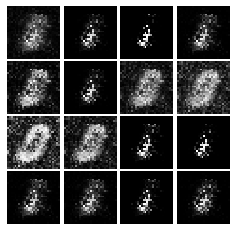


Iter: 750, D: 0.8815, G:1.793


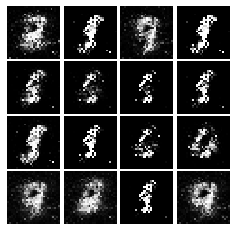


EPOCH:  3
Iter: 1000, D: 1.02, G:1.397


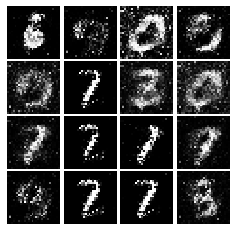


Iter: 1250, D: 1.004, G:1.072


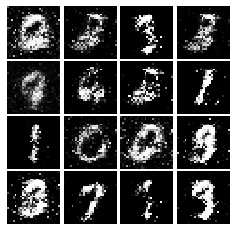


EPOCH:  4
Iter: 1500, D: 1.175, G:1.151


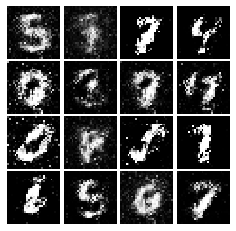


Iter: 1750, D: 1.199, G:1.228


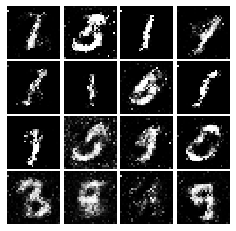


EPOCH:  5
Iter: 2000, D: 1.162, G:0.9771


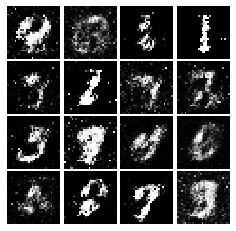


Iter: 2250, D: 1.112, G:1.03


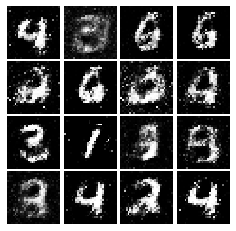


EPOCH:  6
Iter: 2500, D: 1.242, G:0.9789


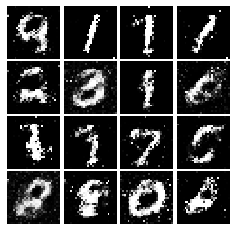


Iter: 2750, D: 1.328, G:0.7737


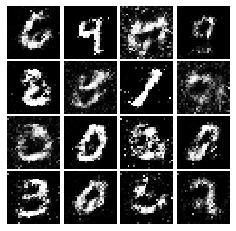


EPOCH:  7
Iter: 3000, D: 1.283, G:2.566


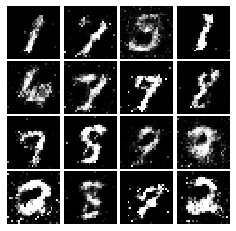


Iter: 3250, D: 1.155, G:0.9658


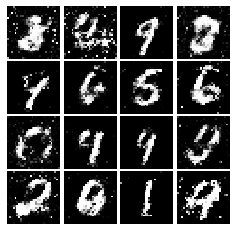


EPOCH:  8
Iter: 3500, D: 1.227, G:0.8864


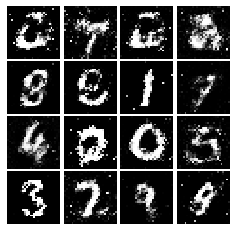


EPOCH:  9
Iter: 3750, D: 1.273, G:0.8577


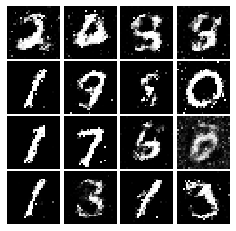


Iter: 4000, D: 1.321, G:0.8171


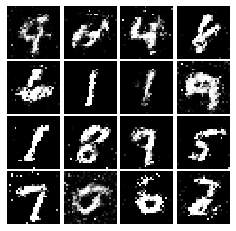


EPOCH:  10
Iter: 4250, D: 1.411, G:0.9116


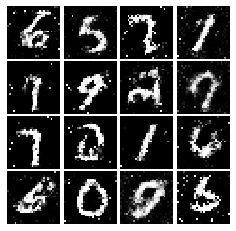


Iter: 4500, D: 1.353, G:0.8764


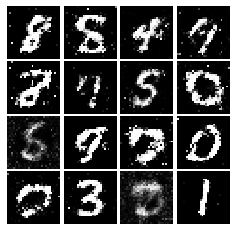

In [8]:
# original GAN
D = discriminator().to(device)
G = generator().to(device)

D_optimizer = torch.optim.Adam(D.parameters(), lr=1e-3, betas = (0.5, 0.999))
G_optimizer = torch.optim.Adam(G.parameters(), lr=1e-3, betas = (0.5, 0.999))

train(D, G, D_optimizer, G_optimizer, discriminator_loss, generator_loss, train_loader=loader_train, num_epochs=10, device=device)

EPOCH:  1
Iter: 0, D: 0.6786, G:0.5259


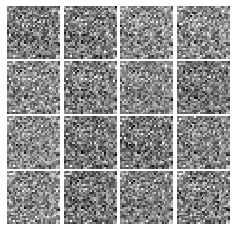


Iter: 250, D: 0.1018, G:0.3749


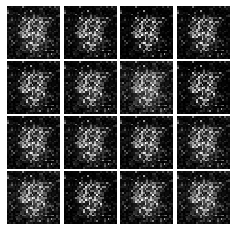


EPOCH:  2
Iter: 500, D: 0.1978, G:0.2833


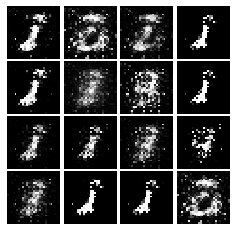


Iter: 750, D: 0.351, G:0.9125


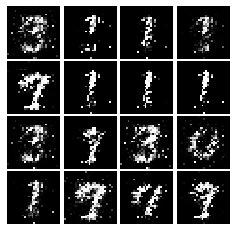


EPOCH:  3
Iter: 1000, D: 0.1565, G:0.2285


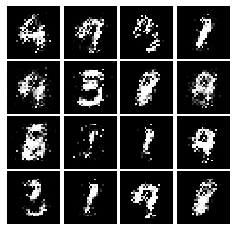


Iter: 1250, D: 0.1396, G:0.262


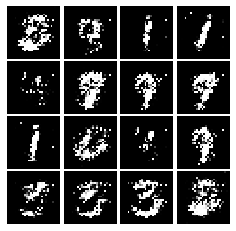


EPOCH:  4
Iter: 1500, D: 0.1751, G:0.1827


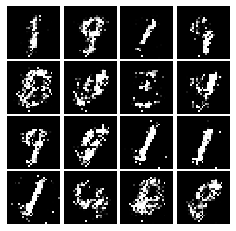


Iter: 1750, D: 0.1846, G:0.2526


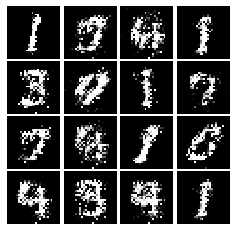


EPOCH:  5
Iter: 2000, D: 0.2059, G:0.1659


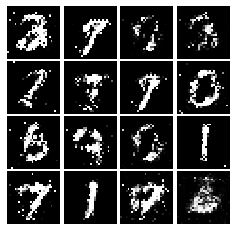


Iter: 2250, D: 0.2343, G:0.2129


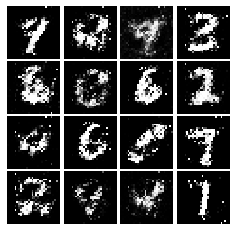


EPOCH:  6
Iter: 2500, D: 0.1978, G:0.1892


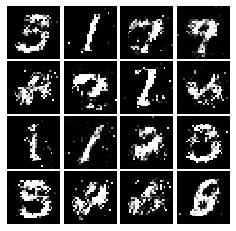


Iter: 2750, D: 0.2288, G:0.1414


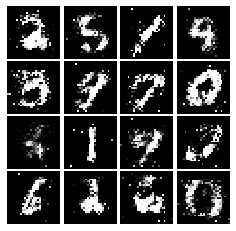


EPOCH:  7
Iter: 3000, D: 0.2116, G:0.1915


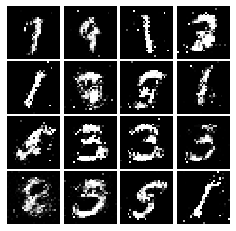


Iter: 3250, D: 0.2151, G:0.189


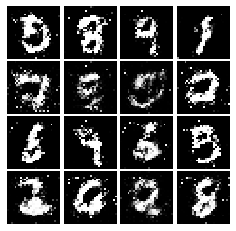


EPOCH:  8
Iter: 3500, D: 0.2283, G:0.1901


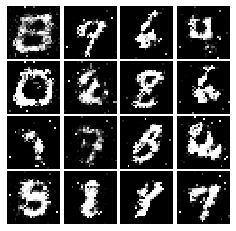


EPOCH:  9
Iter: 3750, D: 0.2032, G:0.185


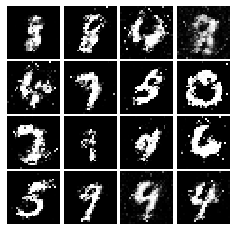


Iter: 4000, D: 0.2398, G:0.2117


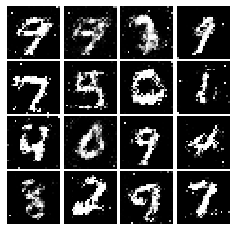

In [ ]:
# LSGAN
D_LS = discriminator().to(device)
G_LS = generator().to(device)

D_LS_optimizer = torch.optim.Adam(D_LS.parameters(), lr=1e-3, betas = (0.5, 0.999))
G_LS_optimizer = torch.optim.Adam(G_LS.parameters(), lr=1e-3, betas = (0.5, 0.999))

train(D_LS, G_LS, D_LS_optimizer, G_LS_optimizer, ls_discriminator_loss, ls_generator_loss, train_loader=loader_train, num_epochs=10, device=device)